In [48]:
# import
from rdkit import Chem # zakladni balicek
from rdkit.Chem.Draw import IPythonConsole # kresleni

In [49]:
aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')

In [50]:
aspirin_dehyd = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)[O-]')

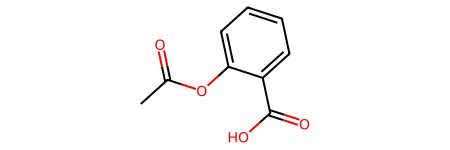

In [51]:
aspirin

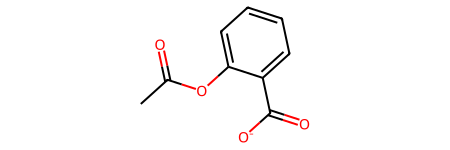

In [52]:
aspirin_dehyd

In [53]:
Chem.MolToSmiles(aspirin) # vraci kanonickou formu (Morgan algorithm)

'CC(=O)Oc1ccccc1C(=O)O'

In [54]:
Chem.MolToInchi(aspirin) # stabilnejsi format, string by mel byt vzdy shodny x hure citelne, neni vhodne jako klice (ID v DB)

'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)'

In [55]:
Chem.MolToInchiKey(aspirin) # zahashovane Inchi, N na konci znamena neutralni naboj, na obe strany abecedy lze naboj vyjadrit presne

'BSYNRYMUTXBXSQ-UHFFFAOYSA-N'

In [56]:
Chem.MolToInchiKey(aspirin_dehyd) # zmena pouze v poslednim znaku

'BSYNRYMUTXBXSQ-UHFFFAOYSA-M'

In [57]:
print(Chem.MolToMolBlock(aspirin)) # RDkit ma funkci, ktera pasuje molekulu do roviny, lze prenaset i 3D struktury molekul


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0

In [81]:
# definice kruhu - kdyz prerusim molekulu v ramci kruhu, zustane stale jedna molekula, jinak vznikaji dve
# alt. pri existenci kruhu existuji dve cesty do jednoho bodu (atomu)
Chem.GetSSSR(aspirin)

<rdkit.rdBase._vectclass std::vector<int,class std::allocator<int> > at 0x185785f38c0>

In [82]:
get_rings = Chem.GetSSSR(aspirin)

In [83]:
len(get_rings) # vraci pocet kruhu

1

In [84]:
cubane = Chem.MolFromInchi('InChI=1S/C8H8/c1-2-5-3(1)7-4(1)6(2)8(5)7/h1-8H')

In [85]:
get_rings = Chem.GetSSSR(cubane)

In [86]:
len(get_rings) # ???

5

In [88]:
aspirin.GetRingInfo().AtomRings()

((4, 9, 8, 7, 6, 5),)

In [89]:
cubane.GetRingInfo().AtomRings()

((0, 2, 4, 1), (0, 3, 5, 1), (0, 3, 6, 2), (1, 5, 7, 4), (2, 6, 7, 4))

In [96]:
suppl = Chem.SDMolSupplier('../../data/drugbank.sdf')

In [100]:
drugs = [m for m in suppl]

In [101]:
drugs

 ...]

In [102]:
len(drugs)

7180

In [103]:
len([x for x in drugs if x]) # nektere jsou prazdne - None

7120

In [104]:
drugs = [m for m in suppl if m]

In [105]:
len(drugs)

7120

In [106]:
rings = [len(Chem.GetSSSR(drug)) for drug in drugs]

In [108]:
sum(rings) # celkovy pocet kruhu ve vsech molekulach

17452

In [110]:
round(sum(rings)/len(rings), 2) # prumerny pocet kruhu na molekulu

2.45